In [1]:
from transformer_utils.low_memory import enable_low_memory_load
import transformers

enable_low_memory_load() #without this model ends up on CPU?
tokenizer = transformers.AutoTokenizer.from_pretrained("gpt2")
model = transformers.AutoModelForCausalLM.from_pretrained('EleutherAI/gpt-neo-125M')

c:\users\stephenprior\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\lazy.py:175: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [2]:
from src.visualization import visualize
text = "Hypothetically, if you were to write a book, what would it be about?"
tokens = visualize.text_to_input_ids(tokenizer, text)
tokens

tensor([[49926,   313, 31786,    11,   611,   345,   547,   284,  3551,   257,
          1492,    11,   644,   561,   340,   307,   546,    30]],
       device='cuda:0')

In [3]:
tokenizer.batch_decode(tokens[0,0:2])

['Hyp', 'ot']

In [14]:
result = model.forward(tokens[0,0:2],output_hidden_states=True)

In [15]:
h11 = result['hidden_states'][11]
h11[0][1][5]

tensor(6.5837, device='cuda:0', grad_fn=<SelectBackward>)

In [ ]:
result = model.forward(tokens[0,0:4],output_hidden_states=True)

In [16]:
h11 = result['hidden_states'][11]
h11[0][1][5]

tensor(6.5837, device='cuda:0', grad_fn=<SelectBackward>)

In [32]:
result.keys()

odict_keys(['logits', 'past_key_values', 'hidden_states'])

In [31]:
result.past_key_values[0][1].shape

torch.Size([1, 12, 2, 64])

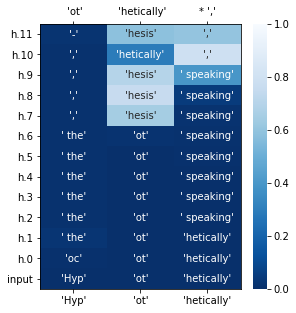

In [7]:
from transformer_utils.logit_lens import plot_logit_lens

plot_logit_lens(model, tokenizer, tokens,start_ix=0,end_ix=3, probs=True)

Do earlier positions remain unchanged when later tokens are added?

KeyError: 'input'

In [12]:
import torch
from transformer_utils.partial_forward import partial_forward

with torch.no_grad():
    output = partial_forward(
        model=model.transformer,  # your `transformers` model
        output_names=[
            'h.0',
            'h.11'
        ],
        input_ids=tokens  # the input to run
    )

# each of these is a tensor
output['h.0'].shape,output['h.11'].shape

KeyError: 'input'